# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

### Neuron:
Each of the nodes in the NN, with a structure analogous to that of brain cells. Neurons are characterized by their connections to a bunch of inputs. These inputs can be features in the data, outputs from neurons in an earlier layer, or a bias term that can be updated when the network learns.  The connections (sometimes called synapses) each have their own characteristic weight.  All the inputs get linearly combined; that is, summed up proportional to the connection weight.  Once combined, these inputs get passed through an activation function that transforms them non-linearly into the neuron's output value. This single output value then gets passed to the next stage, which can be the output of the network or another layer of neurons.

### Input Layer:
The first layer of a NN.  Like all layers, it is made up of neurons.  Unlike other layers, the neurons here receive inputs directly from the dataset, usually one neuron per feature with no biases. In image recognition problems, for example, each neuron in the input layer would be associated with the brightness of a particular pixel in the image.  

### Hidden Layer:
Internal layers of the NN, connecting input and output layers. The neurons here are connected to neurons in the previous layer; in the case of dense layers, every neuron in the previous layer is connected to every neuron in this one. Hidden layers don't need to correspond to any recognizable feature of the outside world.

### Output Layer:
The final layer of the NN.  It contains one neuron for every output variable in the network. The activation functions here should correspond to the desired form of the output.  A sigmoid activation function, for example, is great when the output should represent the probability of something (because sigmoid maps to output values between 0 and 1).

### Activation Function:
Each neuron must aggregate inputs and produce a single output.  The activation function shapes that output to be within useful bounds, and adds a non-linearity that enables the network to model complex non-linear behaviors.  One can use several possible activation functions, but common functions (sigmoid, tanh) will map the whole numberline to a small range ((0,1) or (-1,1)) or get rid of negative numbers (ReLU).  Note that all the nodes in a layer of the NN tend to have the same activation function.

### Backpropagation
A neural network learns by updating all of its weights and biases, based on how its output is different from what its output should be.  The process that achieves this update is called backpropagation.  You start with the predictions, comparing each of them to the known values of the correct answer and using a cost function to determine (with a single number) how far the two answers are from each other. Calculating the gradient of the loss function tells us which way each of the predictions would have to change in order to minimize error, and which changes would have the greatest effect on the error. 

The weights immediately before the output layer are updated based on the gradient of the loss function at each output neuron, proportional to their importance.  The gradient and the weights of the connections allows us to establish the blame of each input for the error in the current layer. The error in each of the N-1 neurons can determined by summing up all the blame from each of its connections, allowing us to repeat the process for the N-1 layer.  

Backpropagation thus moves back through the network, updating the weights of all the connections (and the values of all the biases) so as to decrease the overall error as determined by the loss function. Each update is a small step, proportional to the gradient but bounded by the learning rate, so that the network slowly moves towards the minimum loss and the best results.

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [1]:
import numpy as np
np.random.seed(42)

In [47]:
class Perceptron(object):

    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
    
    # This perceptron has one neuron for every input, plus a bias.
    # Its activation function is a simple step function
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation
    
    # It prints out its current predictions at every training epoch,
    # and updates all the weights and biases with each step
    def train(self, training_inputs, labels):
        print('   Desired      Actual             Weights')
        for _ in range(self.epochs):
            all_preds = []
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                all_preds.append(prediction)
            print([int(x) for x in labels], all_preds, self.weights)

In [48]:
x = np.array([[1,1,1],
              [1,0,1],
              [0,1,1],
              [0,0,1]])

y = np.array([[1],
              [0],
              [0],
              [0]])

pn = Perceptron(no_of_inputs=3, epochs=15, learning_rate=0.01)
pn.train(x,y)

   Desired      Actual             Weights
[1, 0, 0, 0] [0, 1, 1, 0] [-0.01  0.    0.   -0.01]
[1, 0, 0, 0] [0, 1, 0, 0] [-0.01  0.    0.01 -0.01]
[1, 0, 0, 0] [0, 1, 0, 0] [-0.01  0.    0.02 -0.01]
[1, 0, 0, 0] [0, 1, 1, 0] [-0.02  0.    0.02 -0.02]
[1, 0, 0, 0] [0, 0, 1, 0] [-0.02  0.01  0.02 -0.02]
[1, 0, 0, 0] [0, 0, 1, 0] [-0.02  0.02  0.02 -0.02]
[1, 0, 0, 0] [0, 1, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]
[1, 0, 0, 0] [1, 0, 0, 0] [-0.02  0.02  0.03 -0.02]


In [26]:
print("Perceptron's predictions for AND gate")
for row in x:
    print(f'{row[0]} {row[1]} {row[2]}-> {pn.predict(row)}')

Perceptron's predictions for AND gate
1 1 1-> 1
1 0 1-> 0
0 1 1-> 0
0 0 1-> 0


This perceptron converges towards the right answer in less than 10 training steps.

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  # Unlimited columns
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [62]:
# The dataset is clean of nulls and contains just numeric features, so it can be used 
# without much cleaning.

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
scaler = RobustScaler()

y = df.target.values
# Normalize all the columns
x = scaler.fit_transform(df.drop(columns='target'))

In [65]:
# Looks like we'll have 13 input variables
x.shape

(303, 13)

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

/anaconda3/envs/sandbox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.


# 1. Baseline
I'll use one neuron for each input variable, two hidden layers with 13 neurons each and ReLU activation, and sigmoid activation for the one output variable.  The best loss function for binary classification is binary crossentropy.

In [79]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=20, 
                        epochs=20,verbose=1)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# define the grid search parameters
param_grid = dict()

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    n_jobs=1, cv=kfold)

# Fit
grid_result1 = grid.fit(x, y)

Epoch 1/20
242/242 [==============================] - 1s 2ms/step - loss: 0.7854 - acc: 0.4587
Epoch 2/20
242/242 [==============================] - 0s 177us/step - loss: 0.7492 - acc: 0.4545
Epoch 3/20
242/242 [==============================] - 0s 159us/step - loss: 0.7221 - acc: 0.4587
Epoch 4/20
242/242 [==============================] - 0s 181us/step - loss: 0.7015 - acc: 0.5041
Epoch 5/20
242/242 [==============================] - 0s 189us/step - loss: 0.6842 - acc: 0.5372
Epoch 6/20
242/242 [==============================] - 0s 242us/step - loss: 0.6700 - acc: 0.6074
Epoch 7/20
242/242 [==============================] - 0s 153us/step - loss: 0.6572 - acc: 0.6405
Epoch 8/20
242/242 [==============================] - 0s 158us/step - loss: 0.6448 - acc: 0.6694
Epoch 9/20
242/242 [==============================] - 0s 158us/step - loss: 0.6315 - acc: 0.6901
Epoch 10/20
242/242 [==============================] - 0s 156us/step - loss: 0.6173 - acc: 0.7149
Epoch 11/20
242/242 [==========

243/243 [==============================] - 0s 44us/step
Epoch 1/20
243/243 [==============================] - 1s 3ms/step - loss: 0.8091 - acc: 0.4650
Epoch 2/20
243/243 [==============================] - 0s 159us/step - loss: 0.7567 - acc: 0.4938
Epoch 3/20
243/243 [==============================] - 0s 121us/step - loss: 0.7205 - acc: 0.5556
Epoch 4/20
243/243 [==============================] - 0s 142us/step - loss: 0.6895 - acc: 0.5926
Epoch 5/20
243/243 [==============================] - 0s 125us/step - loss: 0.6653 - acc: 0.6379
Epoch 6/20
243/243 [==============================] - 0s 133us/step - loss: 0.6441 - acc: 0.6790
Epoch 7/20
243/243 [==============================] - 0s 126us/step - loss: 0.6250 - acc: 0.6914
Epoch 8/20
243/243 [==============================] - 0s 147us/step - loss: 0.6050 - acc: 0.7243
Epoch 9/20
243/243 [==============================] - 0s 126us/step - loss: 0.5851 - acc: 0.7407
Epoch 10/20
243/243 [==============================] - 0s 145us/step - lo

In [88]:
grid_result = grid_result1


# Report Results
print(f"Best: {grid_result.best_score_*100:.3f}% using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'''
Accuracy: {mean*100:.3f}%
Stdev   : {stdev*100:.3f}%
Params  : {param}

''')

Best: 81.188% using {}

Accuracy: 81.188%
Stdev   : 2.954%
Params  : {}




# 2. Tune batch size

In [93]:
# Adjust parameters
batch_size = [10, 20, 50, 100]
param_grid = dict(batch_size=batch_size)

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=20,verbose=1)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    n_jobs=1, cv=kfold)

# Fit
grid_result2 = grid.fit(x, y)

Epoch 1/20
242/242 [==============================] - 1s 5ms/step - loss: 0.7751 - acc: 0.4587
Epoch 2/20
242/242 [==============================] - 0s 267us/step - loss: 0.7262 - acc: 0.4752
Epoch 3/20
242/242 [==============================] - 0s 255us/step - loss: 0.6942 - acc: 0.5124
Epoch 4/20
242/242 [==============================] - 0s 268us/step - loss: 0.6702 - acc: 0.5909
Epoch 5/20
242/242 [==============================] - 0s 274us/step - loss: 0.6473 - acc: 0.6612
Epoch 6/20
242/242 [==============================] - 0s 309us/step - loss: 0.6249 - acc: 0.6983
Epoch 7/20
242/242 [==============================] - 0s 258us/step - loss: 0.6006 - acc: 0.7397
Epoch 8/20
242/242 [==============================] - 0s 268us/step - loss: 0.5747 - acc: 0.7603
Epoch 9/20
242/242 [==============================] - 0s 256us/step - loss: 0.5483 - acc: 0.7810
Epoch 10/20
242/242 [==============================] - 0s 264us/step - loss: 0.5222 - acc: 0.7934
Epoch 11/20
242/242 [==========

243/243 [==============================] - 0s 127us/step
Epoch 1/20
243/243 [==============================] - 1s 5ms/step - loss: 0.7917 - acc: 0.4733
Epoch 2/20
243/243 [==============================] - 0s 257us/step - loss: 0.7195 - acc: 0.5514
Epoch 3/20
243/243 [==============================] - 0s 230us/step - loss: 0.6720 - acc: 0.6296
Epoch 4/20
243/243 [==============================] - 0s 259us/step - loss: 0.6339 - acc: 0.6872
Epoch 5/20
243/243 [==============================] - 0s 253us/step - loss: 0.6009 - acc: 0.7284
Epoch 6/20
243/243 [==============================] - 0s 236us/step - loss: 0.5680 - acc: 0.7613
Epoch 7/20
243/243 [==============================] - 0s 270us/step - loss: 0.5364 - acc: 0.7901
Epoch 8/20
243/243 [==============================] - 0s 293us/step - loss: 0.5051 - acc: 0.8107
Epoch 9/20
243/243 [==============================] - 0s 271us/step - loss: 0.4729 - acc: 0.8148
Epoch 10/20
243/243 [==============================] - 0s 257us/step - l

242/242 [==============================] - 0s 63us/step
Epoch 1/20
243/243 [==============================] - 2s 6ms/step - loss: 0.7495 - acc: 0.4650
Epoch 2/20
243/243 [==============================] - 0s 158us/step - loss: 0.7042 - acc: 0.5267
Epoch 3/20
243/243 [==============================] - 0s 157us/step - loss: 0.6716 - acc: 0.5967
Epoch 4/20
243/243 [==============================] - 0s 166us/step - loss: 0.6471 - acc: 0.6379
Epoch 5/20
243/243 [==============================] - 0s 159us/step - loss: 0.6284 - acc: 0.7037
Epoch 6/20
243/243 [==============================] - 0s 264us/step - loss: 0.6095 - acc: 0.7243
Epoch 7/20
243/243 [==============================] - 0s 258us/step - loss: 0.5929 - acc: 0.7449
Epoch 8/20
243/243 [==============================] - 0s 182us/step - loss: 0.5769 - acc: 0.7654
Epoch 9/20
243/243 [==============================] - 0s 188us/step - loss: 0.5627 - acc: 0.7819
Epoch 10/20
243/243 [==============================] - 0s 166us/step - lo

242/242 [==============================] - 0s 47us/step
Epoch 1/20
242/242 [==============================] - 2s 7ms/step - loss: 0.6738 - acc: 0.5496
Epoch 2/20
242/242 [==============================] - 0s 72us/step - loss: 0.6598 - acc: 0.5744
Epoch 3/20
242/242 [==============================] - 0s 89us/step - loss: 0.6471 - acc: 0.6074
Epoch 4/20
242/242 [==============================] - 0s 88us/step - loss: 0.6358 - acc: 0.6488
Epoch 5/20
242/242 [==============================] - 0s 91us/step - loss: 0.6245 - acc: 0.6777
Epoch 6/20
242/242 [==============================] - 0s 93us/step - loss: 0.6137 - acc: 0.7066
Epoch 7/20
242/242 [==============================] - 0s 97us/step - loss: 0.6029 - acc: 0.7231
Epoch 8/20
242/242 [==============================] - 0s 95us/step - loss: 0.5924 - acc: 0.7397
Epoch 9/20
242/242 [==============================] - 0s 94us/step - loss: 0.5830 - acc: 0.7314
Epoch 10/20
242/242 [==============================] - 0s 86us/step - loss: 0.572

242/242 [==============================] - 0s 32us/step
Epoch 1/20
242/242 [==============================] - 2s 7ms/step - loss: 0.7077 - acc: 0.4917
Epoch 2/20
242/242 [==============================] - 0s 54us/step - loss: 0.6980 - acc: 0.5083
Epoch 3/20
242/242 [==============================] - 0s 56us/step - loss: 0.6885 - acc: 0.5248
Epoch 4/20
242/242 [==============================] - 0s 61us/step - loss: 0.6803 - acc: 0.5537
Epoch 5/20
242/242 [==============================] - 0s 68us/step - loss: 0.6718 - acc: 0.5702
Epoch 6/20
242/242 [==============================] - 0s 72us/step - loss: 0.6636 - acc: 0.5868
Epoch 7/20
242/242 [==============================] - 0s 58us/step - loss: 0.6561 - acc: 0.6198
Epoch 8/20
242/242 [==============================] - 0s 60us/step - loss: 0.6479 - acc: 0.6612
Epoch 9/20
242/242 [==============================] - 0s 65us/step - loss: 0.6400 - acc: 0.6942
Epoch 10/20
242/242 [==============================] - 0s 65us/step - loss: 0.632

243/243 [==============================] - 0s 56us/step


/anaconda3/envs/sandbox/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/20
303/303 [==============================] - 3s 10ms/step - loss: 0.7116 - acc: 0.4653
Epoch 2/20
303/303 [==============================] - 0s 317us/step - loss: 0.6797 - acc: 0.4818
Epoch 3/20
303/303 [==============================] - 0s 324us/step - loss: 0.6508 - acc: 0.5974
Epoch 4/20
303/303 [==============================] - 0s 335us/step - loss: 0.6141 - acc: 0.7129
Epoch 5/20
303/303 [==============================] - 0s 407us/step - loss: 0.5693 - acc: 0.7624
Epoch 6/20
303/303 [==============================] - 0s 406us/step - loss: 0.5172 - acc: 0.7921
Epoch 7/20
303/303 [==============================] - 0s 415us/step - loss: 0.4699 - acc: 0.8119
Epoch 8/20
303/303 [==============================] - 0s 443us/step - loss: 0.4295 - acc: 0.8350
Epoch 9/20
303/303 [==============================] - 0s 403us/step - loss: 0.4011 - acc: 0.8647
Epoch 10/20
303/303 [==============================] - 0s 482us/step - loss: 0.3825 - acc: 0.8581
Epoch 11/20
303/303 [=========

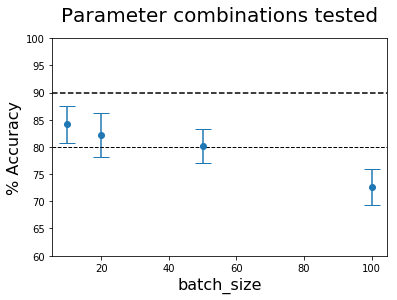

Accuracy: 84.16%  Stdev: 3.44% Params: {'batch_size': 10}
Accuracy: 82.18%  Stdev: 4.03% Params: {'batch_size': 20}
Accuracy: 80.20%  Stdev: 3.16% Params: {'batch_size': 50}
Accuracy: 72.61%  Stdev: 3.25% Params: {'batch_size': 100}

Best: 84.16% using {'batch_size': 10}


In [106]:
grid_result = grid_result2

# Plot the accuracy of all the things tried in this gridsearch
var = [x['batch_size'] for x in params]

fig, ax = plt.subplots()
ax.set_xlabel('batch_size', fontsize=16)
ax.set_ylabel('% Accuracy', fontsize=16)
ax.set_ylim(60,100)
ax.axhline(80, color='k', linestyle='--', linewidth=1)
ax.axhline(90, color='k', linestyle='--')
ax = plt.errorbar(var, means, yerr=stds, fmt='o', capsize=8)
plt.title('Parameter combinations tested', fontsize=20, y=1.05)
plt.show()

# Report Results
means = [x*100 for x in grid_result.cv_results_['mean_test_score']]
stds = [x*100 for x in grid_result.cv_results_['std_test_score']]
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Accuracy: {mean:.2f}%  Stdev: {stdev:.2f}% Params: {param}')
print()
print(f"Best: {grid_result.best_score_*100:.2f}% using {grid_result.best_params_}")

I'll stick with a batch size of 10

# 3. Tune learning rate

In [108]:
# Learning rate is fed to an optimizer instance, so I have to import that library
from keras import optimizers

In [109]:
# Adjust parameters
lr = [.001, .01, .1, .5]
param_grid = dict(lr=lr)

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model(lr):
    model = Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = optimizers.Adam(lr=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=20, batch_size=10, verbose=1)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    n_jobs=1, cv=kfold)

# Fit
grid_result3 = grid.fit(x, y)

Epoch 1/20
242/242 [==============================] - 2s 9ms/step - loss: 0.7750 - acc: 0.4587
Epoch 2/20
242/242 [==============================] - 0s 388us/step - loss: 0.7261 - acc: 0.4752
Epoch 3/20
242/242 [==============================] - 0s 360us/step - loss: 0.6942 - acc: 0.5124
Epoch 4/20
242/242 [==============================] - 0s 399us/step - loss: 0.6702 - acc: 0.5909
Epoch 5/20
242/242 [==============================] - 0s 377us/step - loss: 0.6473 - acc: 0.6612
Epoch 6/20
242/242 [==============================] - 0s 395us/step - loss: 0.6249 - acc: 0.6983
Epoch 7/20
242/242 [==============================] - 0s 509us/step - loss: 0.6006 - acc: 0.7397
Epoch 8/20
242/242 [==============================] - 0s 408us/step - loss: 0.5748 - acc: 0.7603
Epoch 9/20
242/242 [==============================] - 0s 369us/step - loss: 0.5484 - acc: 0.7810
Epoch 10/20
242/242 [==============================] - 0s 394us/step - loss: 0.5223 - acc: 0.7934
Epoch 11/20
242/242 [==========

243/243 [==============================] - 0s 307us/step
Epoch 1/20
243/243 [==============================] - 2s 10ms/step - loss: 0.7931 - acc: 0.4733
Epoch 2/20
243/243 [==============================] - 0s 371us/step - loss: 0.7206 - acc: 0.5514
Epoch 3/20
243/243 [==============================] - 0s 360us/step - loss: 0.6730 - acc: 0.6255
Epoch 4/20
243/243 [==============================] - 0s 384us/step - loss: 0.6347 - acc: 0.6872
Epoch 5/20
243/243 [==============================] - 0s 378us/step - loss: 0.6016 - acc: 0.7243
Epoch 6/20
243/243 [==============================] - 0s 392us/step - loss: 0.5689 - acc: 0.7613
Epoch 7/20
243/243 [==============================] - 0s 353us/step - loss: 0.5375 - acc: 0.7901
Epoch 8/20
243/243 [==============================] - 0s 392us/step - loss: 0.5065 - acc: 0.8107
Epoch 9/20
243/243 [==============================] - 0s 358us/step - loss: 0.4746 - acc: 0.8107
Epoch 10/20
243/243 [==============================] - 0s 383us/step - 

242/242 [==============================] - 0s 273us/step
Epoch 1/20
243/243 [==============================] - 2s 10ms/step - loss: 0.6215 - acc: 0.6502
Epoch 2/20
243/243 [==============================] - 0s 374us/step - loss: 0.4494 - acc: 0.8436
Epoch 3/20
243/243 [==============================] - 0s 370us/step - loss: 0.3784 - acc: 0.8477
Epoch 4/20
243/243 [==============================] - 0s 363us/step - loss: 0.3502 - acc: 0.8642
Epoch 5/20
243/243 [==============================] - 0s 398us/step - loss: 0.3252 - acc: 0.8519
Epoch 6/20
243/243 [==============================] - 0s 383us/step - loss: 0.3260 - acc: 0.8683
Epoch 7/20
243/243 [==============================] - 0s 384us/step - loss: 0.2930 - acc: 0.9012
Epoch 8/20
243/243 [==============================] - 0s 380us/step - loss: 0.2772 - acc: 0.8848
Epoch 9/20
243/243 [==============================] - 0s 387us/step - loss: 0.2614 - acc: 0.9136
Epoch 10/20
243/243 [==============================] - 0s 367us/step - 

242/242 [==============================] - 0s 277us/step
Epoch 1/20
242/242 [==============================] - 4s 15ms/step - loss: 0.5319 - acc: 0.7893
Epoch 2/20
242/242 [==============================] - 0s 569us/step - loss: 0.4180 - acc: 0.8347
Epoch 3/20
242/242 [==============================] - 0s 441us/step - loss: 0.4625 - acc: 0.8058
Epoch 4/20
242/242 [==============================] - 0s 595us/step - loss: 0.4173 - acc: 0.8388
Epoch 5/20
242/242 [==============================] - 0s 490us/step - loss: 0.3653 - acc: 0.8140
Epoch 6/20
242/242 [==============================] - 0s 487us/step - loss: 0.3445 - acc: 0.8264
Epoch 7/20
242/242 [==============================] - 0s 438us/step - loss: 0.3514 - acc: 0.8636
Epoch 8/20
242/242 [==============================] - 0s 433us/step - loss: 0.3766 - acc: 0.8223
Epoch 9/20
242/242 [==============================] - 0s 398us/step - loss: 0.3799 - acc: 0.8017
Epoch 10/20
242/242 [==============================] - 0s 543us/step - 

242/242 [==============================] - 0s 414us/step - loss: 3.0547 - acc: 0.7893
Epoch 20/20
242/242 [==============================] - 0s 282us/step
Epoch 1/20
242/242 [==============================] - 4s 15ms/step - loss: 1.3202 - acc: 0.4876
Epoch 2/20
242/242 [==============================] - 0s 903us/step - loss: 0.8808 - acc: 0.5207
Epoch 3/20
242/242 [==============================] - 0s 1ms/step - loss: 0.8921 - acc: 0.4876
Epoch 4/20
242/242 [==============================] - 0s 743us/step - loss: 1.7176 - acc: 0.5455
Epoch 5/20
242/242 [==============================] - 0s 1ms/step - loss: 1.1760 - acc: 0.5702
Epoch 6/20
242/242 [==============================] - 0s 622us/step - loss: 0.7546 - acc: 0.4835
Epoch 7/20
242/242 [==============================] - 0s 630us/step - loss: 0.7946 - acc: 0.5041
Epoch 8/20
242/242 [==============================] - 0s 627us/step - loss: 1.1482 - acc: 0.5207
Epoch 9/20
242/242 [==============================] - 0s 639us/step - loss

243/243 [==============================] - 0s 439us/step - loss: 0.7480 - acc: 0.4650
Epoch 19/20
243/243 [==============================] - 0s 462us/step - loss: 0.7190 - acc: 0.4938
Epoch 20/20
243/243 [==============================] - 0s 290us/step


/anaconda3/envs/sandbox/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/20
303/303 [==============================] - 3s 11ms/step - loss: 0.7116 - acc: 0.4653
Epoch 2/20
303/303 [==============================] - 0s 456us/step - loss: 0.6797 - acc: 0.4818
Epoch 3/20
303/303 [==============================] - 0s 561us/step - loss: 0.6508 - acc: 0.5974
Epoch 4/20
303/303 [==============================] - 0s 498us/step - loss: 0.6141 - acc: 0.7129
Epoch 5/20
303/303 [==============================] - 0s 454us/step - loss: 0.5693 - acc: 0.7624
Epoch 6/20
303/303 [==============================] - 0s 503us/step - loss: 0.5172 - acc: 0.7921
Epoch 7/20
303/303 [==============================] - 0s 456us/step - loss: 0.4699 - acc: 0.8119
Epoch 8/20
303/303 [==============================] - 0s 488us/step - loss: 0.4295 - acc: 0.8350
Epoch 9/20
303/303 [==============================] - 0s 466us/step - loss: 0.4011 - acc: 0.8647
Epoch 10/20
303/303 [==============================] - 0s 487us/step - loss: 0.3825 - acc: 0.8581
Epoch 11/20
303/303 [=========

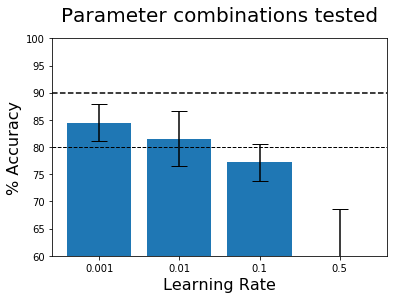

Accuracy: 84.49%  Stdev: 3.45% Params: {'lr': 0.001}
Accuracy: 81.52%  Stdev: 5.08% Params: {'lr': 0.01}
Accuracy: 77.23%  Stdev: 3.39% Params: {'lr': 0.1}
Accuracy: 58.42%  Stdev: 10.23% Params: {'lr': 0.5}

Best: 84.49% using {'lr': 0.001}


In [112]:
grid_result = grid_result3

means = [x*100 for x in grid_result.cv_results_['mean_test_score']]
stds = [x*100 for x in grid_result.cv_results_['std_test_score']]
params = grid_result.cv_results_['params']

# Plot the accuracy of all the things tried in this gridsearch
var = [str(x['lr']) for x in params]

fig, ax = plt.subplots()
ax.set_xlabel('Learning Rate', fontsize=16)
ax.set_ylabel('% Accuracy', fontsize=16)
ax.set_ylim(60,100)
ax.axhline(80, color='k', linestyle='--', linewidth=1)
ax.axhline(90, color='k', linestyle='--')
ax = plt.bar(var, means, yerr=stds, capsize=8)
plt.title('Parameter combinations tested', fontsize=20, y=1.05)
plt.show()

# Report Results
for mean, stdev, param in zip(means, stds, params):
    print(f'Accuracy: {mean:.2f}%  Stdev: {stdev:.2f}% Params: {param}')
print()
print(f"Best: {grid_result.best_score_*100:.2f}% using {grid_result.best_params_}")

Stick with the default learning rate, is what I say